<Body>   
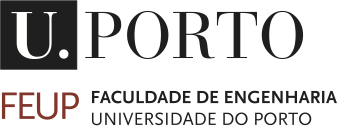   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP, September. 2022

---

# **Motion Perception and Tracking**


<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Perceiving Motion</a></li>
    <li><a href="#ref2">Detection of moving objects</a></li>
    <li><a href="#ref3">Tracking using Kalman Filter</a></li>
</ol>
<p></p>
</div>
<hr>


This lecture's objective is to detect and track a moving ball by taking an initial set of object detections and then tracking the object's centroid, as it moves around frames in a video, and maintaining the correct estimation of the ball's positioning.

This lecture involves the following subjects: RGB images, optical flow estimation, image segmentation (using the magnitude of motion), image moments and Kalman Filter.
The algoritm that will be implemented is the following:

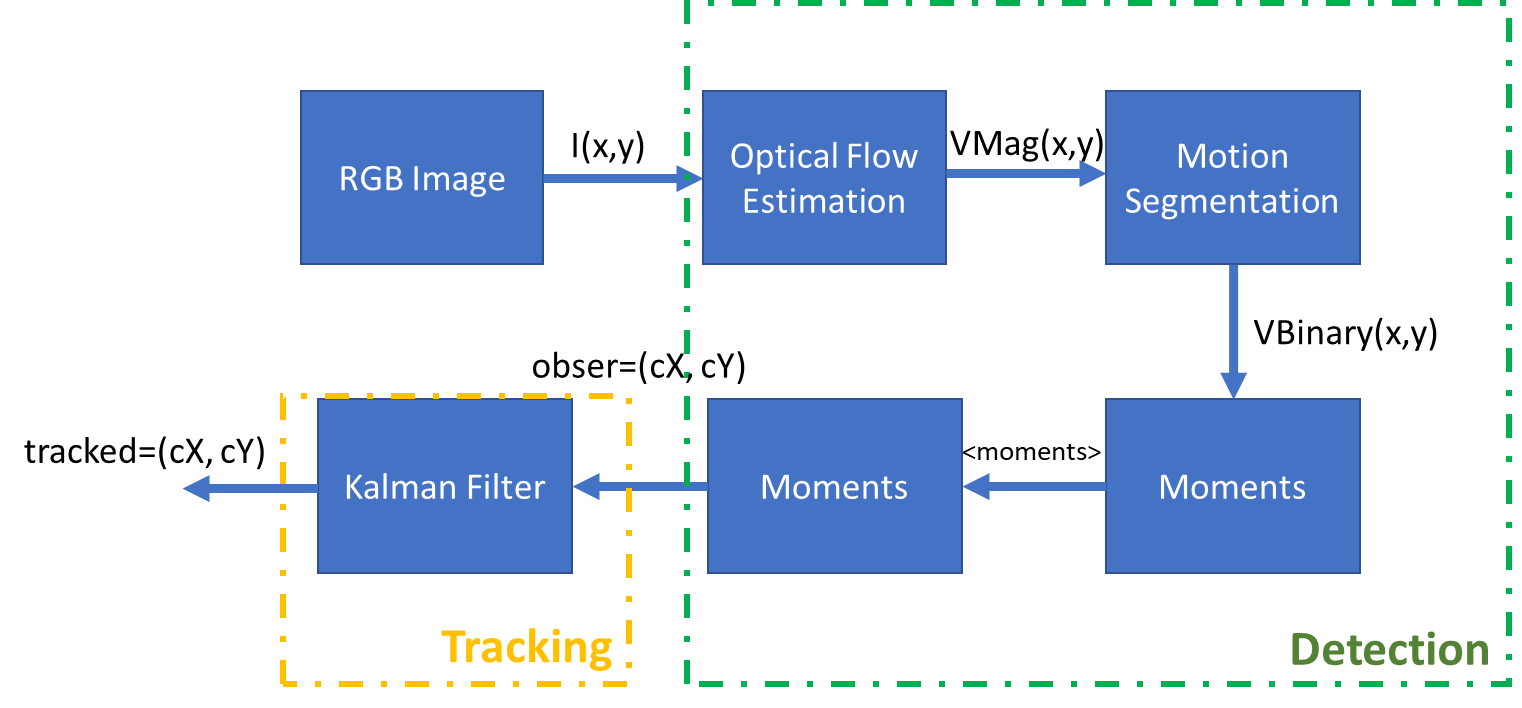


The expected result is similar to the next image, where green and blue dots represent the detected and tracked position of the ball, respectively. Implement the algorithm described above.


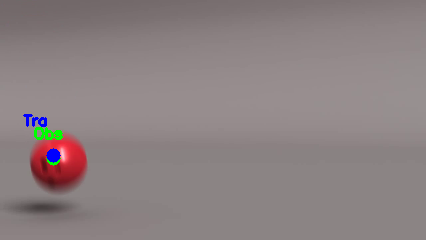

# 1. Perceiving motion using Optical Flow
The ability to comprehend visual changes in a sequence of images can be referred to as motion perception. It plays a crucial part in autonomous systems, providing relevant information about the speed and direction of any moving object in a scene. But how can we estimate the movement of pixels in between consecutive images? Optical flow algorithms are a state-of-the-art solution that allows us to achieve this end. Let's put it in practice.




## Uploading a video file to Colab

Plastic Ball Bouncing (as"videoPlastic.mp4") and the Tennis Ball Bouncing (as "videoTennis.mp4"). Use the "videoPlastic.mp4" during the lecture.


In [1]:
# download the first video
#!wget --output-document=videoPlastic.mp4 "https://uporto-my.sharepoint.com/:v:/g/personal/up488707_up_pt/EYZ0leFcVCxEoQwTk0cd6JoBqAc70vr8i9MsnsrEbs8Pkw?download=1"

# download the second video
#!wget  --output-document=videoTennis.mp4 "https://uporto-my.sharepoint.com/:v:/g/personal/up488707_up_pt/EZ1KHTiemnJPr25KFtspehABr3gylXNPEBpYFGCLEzcG0g?download=1"

!pip install gdown
!gdown --id 1wVsKqCOkRbkPTXhyrhNweqqrXvzLKBHc -O videoPlastic.mp4
!gdown --id 1Tr4xLWFyWOyBgxw1vb55DZGgsBPBr1wa -O videoTennis.mp4

# uncomment the next lines for uploading any video
#from google.colab import files
#uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wVsKqCOkRbkPTXhyrhNweqqrXvzLKBHc
To: /content/videoPlastic.mp4
100% 215k/215k [00:00<00:00, 86.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Tr4xLWFyWOyBgxw1vb55DZGgsBPBr1wa
To: /content/videoTennis.mp4
100% 1.09M/1.09M [00:00<00:00, 33.7MB/s]


## Visualizing the videos

In [2]:
#installing a visualizer
!pip install -U kora
from kora.drive import upload_public
from IPython.display import HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00


In [3]:
# Plastic Ball Bouncing
url = upload_public('videoPlastic.mp4')
HTML(f"""<video src={url} width=600 controls/>""")

In [4]:
# Tennis Ball Bouncing
url = upload_public('videoTennis.mp4')
HTML(f"""<video src={url} width=600 controls/>""")

The following code snippet implements the Farneback dense optical flow. We extract frames from the video above, and feed consecutive images to our algorithm.

In [18]:
from google.colab.patches import cv2_imshow
from time import time as timer
import numpy as np
import cv2
import sys

filename_video = "videoPlastic.mp4"
file_path_output = "videoPlasticOut.mp4"
#filename_video = "videoTennis.mp4"
#file_path_output = "videoTennisOut.mp4"

fps = 30
dt = 1/30
scale = 3


# Get a VideoCapture object
vc = cv2.VideoCapture(filename_video)

# Read first frame
_, first_frame = vc.read()
first_frame = cv2.resize(first_frame, (int(first_frame.shape[1]/scale),int(first_frame.shape[0]/scale)))


# Writer*'X264'
w, h = first_frame.shape[0], first_frame.shape[1]
fourcc = cv2.VideoWriter_fourcc(*'X264')
writer = cv2.VideoWriter(file_path_output, fourcc, fps, (w, h))

### Exercise 1: Calculate the dense Optical Flow

a) convert a BRG image to Gray scale.

b) see [calcOpticalFlowFarneback](https://shimat.github.io/opencvsharp_docs/html/6fefb49a-4149-d895-7939-1227d1e1d4eb.htm) function and try different `pyr_scale`, `levels` and `winsize` parameters.

c) calculate the magnitude of motion. See [cartToPolar](https://shimat.github.io/opencvsharp_docs/html/d8325d06-b4c4-2e2e-9eec-dee08f6e8098.htm).

In [19]:
# to complete

if vc.isOpened() :
  # Convert to gray scale
  prev_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


img_vec = []
img_gray_vec = []
flow_vec = []
flow_vec_mag = []

while(vc.isOpened()):
    # Read a frame from video
    _, new_frame = vc.read()

    if (new_frame is None):
      break

    new_frame = cv2.resize(new_frame, (int(new_frame.shape[1]/scale),int(new_frame.shape[0]/scale)))
    img_vec.append(new_frame)

    # Convert new frame to gray scale
    new_frame_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    img_gray_vec.append(new_frame_gray)

    # Calculate dense optical flow by Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_frame_gray, new_frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    flow_vec.append(flow)

    # Compute the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[...,0], flow[...,1])
    flow_vec_mag.append(magnitude)

    # Update previous frame
    prev_frame_gray = new_frame_gray

print("Number of frames", len(img_gray_vec))

Number of frames 286


The output is a flow field that encodes the pixel movements across the X and Y axis. If we transform this information into its polar representation, we obtain two components that are easier for us to visualize and understand:

1. Magnitude -> How much a pixel moves in consecutive frames
2. Angle     -> The direction in which it moves

This way, we can use an HSV color wheel to represent this information:

![](https://drive.google.com/uc?export=view&id=165b1BimSqZaFXV01GlE-WFYZ6pBTzdFe)

Each quadrant will represent the direction in which pixels move, and the intensity of the color will translate how much a pixel moves. Since the observer is stationary is this example, we do not have to consider any egomotion constrains.

Now let's visualize some portions of the video we processed above. The output of the following code snippet will be a concatenation of two images: the first depicting the colorized optical flow output, and the second the flow field vectors.

>Play around with different portions of the data and use the color wheel above to interpret it.


In [20]:
# Install python optical flow visualization tool
!pip install flow_vis

from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep
import numpy as np
import flow_vis

# Show optical flow as a vector field
def draw_flow(img, flow, step=16):

    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T

    lines = np.vstack([x, y, x-fx, y-fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)

    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for (x1, y1), (_x2, _y2) in lines:
         cv2.polylines(img_bgr, lines, 0, (255, 0, 0),2)

    return img_bgr

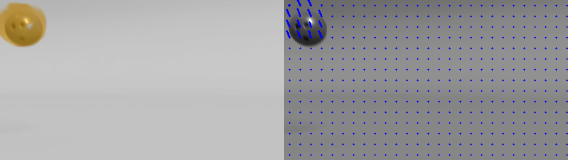

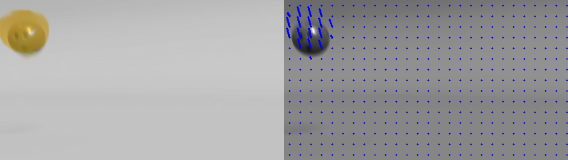

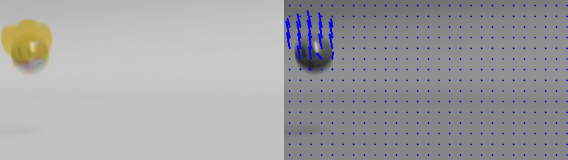

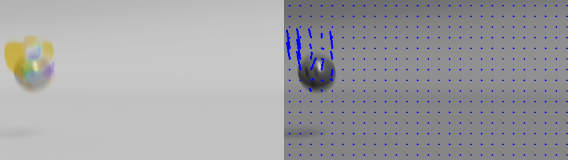

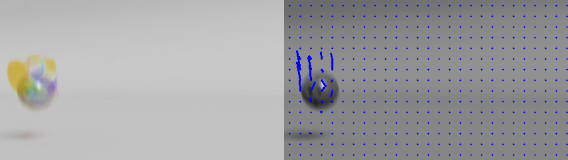

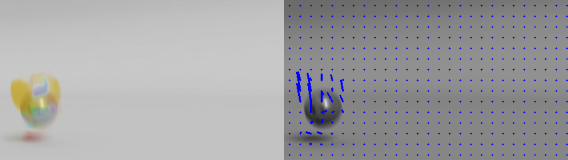

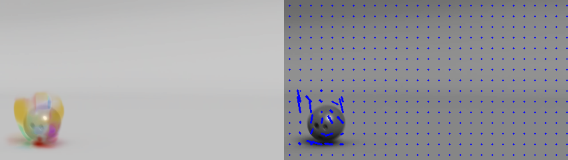

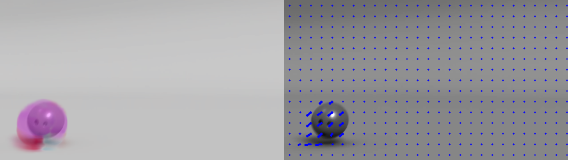

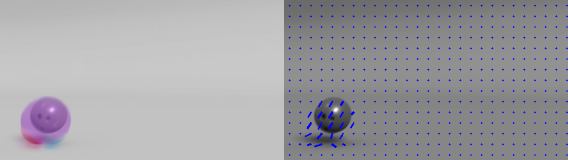

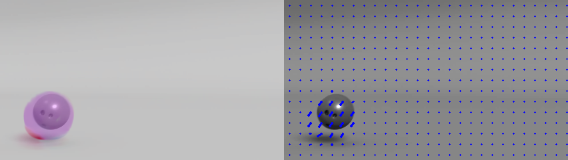

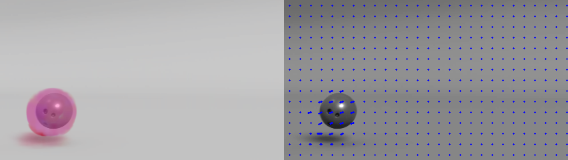

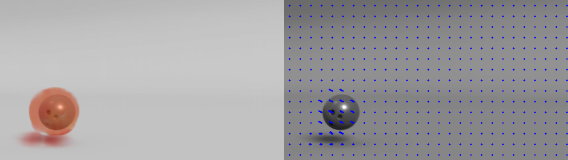

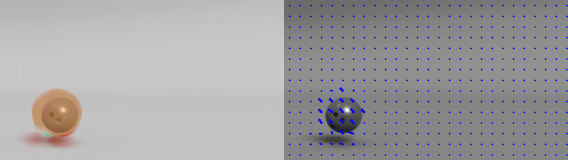

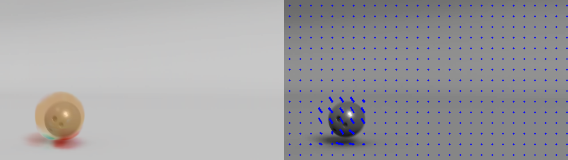

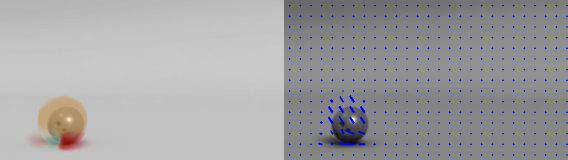

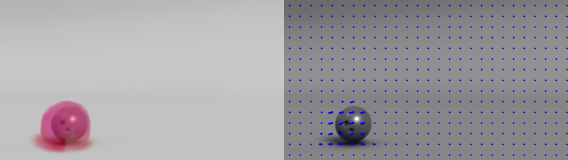

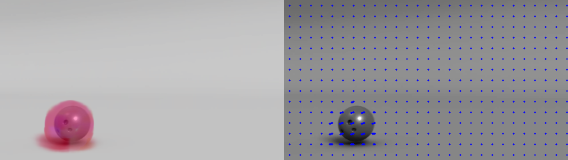

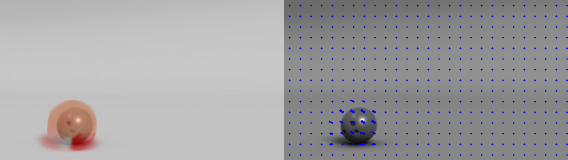

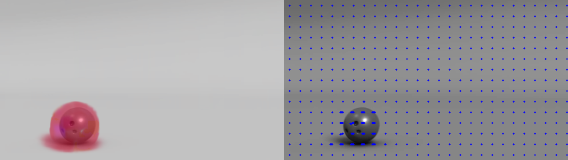

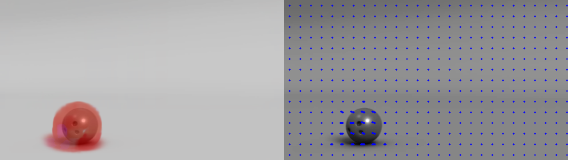

In [ ]:

# Select a portion of the video to visualize
img_gray_portion = np.array(img_gray_vec[5:25])
flow_vec_portion = np.array(flow_vec[5:25])

# Iterate through and show each image
for i in range(flow_vec_portion.shape[0]):
  bgr = cv2.cvtColor(img_gray_portion[i], cv2.COLOR_GRAY2BGR)
  flow_color = flow_vis.flow_to_color(flow_vec_portion[i], convert_to_bgr=True)
  vis = cv2.addWeighted(bgr, 0.5, flow_color, 0.5, 0)

  writer.write(vis)

  vis = np.concatenate((vis, draw_flow(img_gray_portion[i], flow_vec_portion[i])), axis=1)
  vis = cv2.resize(vis, (int(vis.shape[1]/1.5),int(vis.shape[0]/1.5)))
  cv2_imshow(vis)


writer.release()

Important: Discuss the results!!

# 2. Detection of moving objects

### Exercise 2: Detect the object

a) Segment the magnitude of motion into a binary image using the threshold 1.0.

b) Extract the outer contours of the binary image. See  [cv2.findContours](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).

c) Use the largest contour and extract the centroids. See [cv2.moments](https://docs.opencv.org/3.4/d0/d49/tutorial_moments.html) and [here](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html).

d) Discuss other motion perception alternatives that can also be applied to this scenario.

In [ ]:
#to complete

observation_px = []
observation_py = []

# Iterate through and show each image
for i in range(len(img_gray_vec)):
  print("Frame: ", i)
  binary_flow = flow_vec_mag[i] > 1.0
  binary_flow = binary_flow.astype(np.uint8)
  binary_flow = binary_flow.astype(np.uint8)

  # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
  contours, hierarchy = cv2.findContours(binary_flow, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  # draw contours on the original image
  image_copy = img_vec[i].copy()

  if len(contours) <= 0:
    observation_px.append(-1)
    observation_py.append(-1)
    continue;

  # find largest contour
  idx_max = contours[0]
  len_max = 0
  for c in contours:
    len_contour = len(c)
    if len_contour > len_max:
      len_max = len_contour
      idx_max = c

  M = cv2.moments(idx_max)
  # If area of contour is zero => no detection possible
  if M["m00"] == 0 :
    observation_px.append(-1)
    observation_py.append(-1)
    continue;

  # compute the center of the contour
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  observation_px.append(cX)
  observation_py.append(cY)
  # draw the contour and center of the shape on the image
  cv2.circle(image_copy, (cX, cY), 7, (0, 255, 0), -1)
  cv2.putText(image_copy, "Obs", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  cv2_imshow(image_copy)
  print(binary_flow)


# 3. Tracking using a Kalman Filter

## Inniatilization of the Kalman Filter

### Exercise 3: Tracking innitialization

a) Read the supplementary matterial about Kalman Filter available on the moodle

b) Define the `transitionMatrix` and `measurementMatrix`, by considering that there is no control, and the state is $x=[px, py, vx, vy]$, where $px$ and $py$ are the centroid coordinates and $vx$ and $vy$ are the velocity coordinates.

In [ ]:
# Initialize state
xinit = observation_px[0]
yinit = observation_py[0]
vxinit = (observation_px[1]-observation_px[0])/fps
vyinit = (observation_py[1]-observation_py[0])/fps
initstate = [xinit, yinit, vxinit, vyinit]

# Setup Kalman filter
kalman_fil = cv2.KalmanFilter(4,2)
kalman_fil.statePost = np.array(initstate, np.float32)
kalman_fil.statePre = np.array(initstate, np.float32)

dt = 1.0/fps
kalman_fil.transitionMatrix = np.array([[1, 0, fps, 0],
                                      [0, 1, 0, fps],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]], np.float32)

kalman_fil.measurementMatrix = np.array([[1, 0, 0, 0],
                                       [0, 1, 0, 0]], np.float32)

## Tracking the position of the ball

### Exercise 4: Kalman filter prediction and correction

a) The `.predict()` function  should be called is all cycles (independently, if there is an observation or not)

b) The `.correct()` function is called when there is an observation.

c) Discuss the difference between the `.predict()` and `.correct()`.

d) Adjust the covariance errors and discuss the results.

Note: an observation means that the ball was correctly detected (aka, the position is different from -1).

In [ ]:
measured = []
predicted_px = []
predicted_py = []
mp = np.zeros((2,1), np.float32)  # Measurement array
tp = np.zeros((2,1), np.float32)  # Prediction array

for i in range(len(img_vec)):
   print(i)

   # Always predict next state
   tp = kalman_fil.predict()

   if observation_px[i] > -1:
       # Update measurement when ball is detected
       mp[0] = observation_px[i]
       mp[1] = observation_py[i]
       # Correct prediction with measurement
       kalman_fil.correct(mp)

   measured.append(mp.copy())
   predicted_px.append(int(tp[0]))
   predicted_py.append(int(tp[1]))

   # Visualization
   image_copy = img_vec[i].copy()
   cv2.circle(image_copy, (observation_px[i], observation_py[i]), 7, (0, 255, 0), -1)
   cv2.circle(image_copy, (int(tp[0]), int(tp[1])), 7, (255, 0, 0), -1)
   cv2.putText(image_copy, "Obs", (observation_px[i] - 20, observation_py[i] - 20),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
   cv2.putText(image_copy, "Tra", (int(tp[0]) - 30, int(tp[1]) - 30),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
   cv2_imshow(image_copy)

## Show results

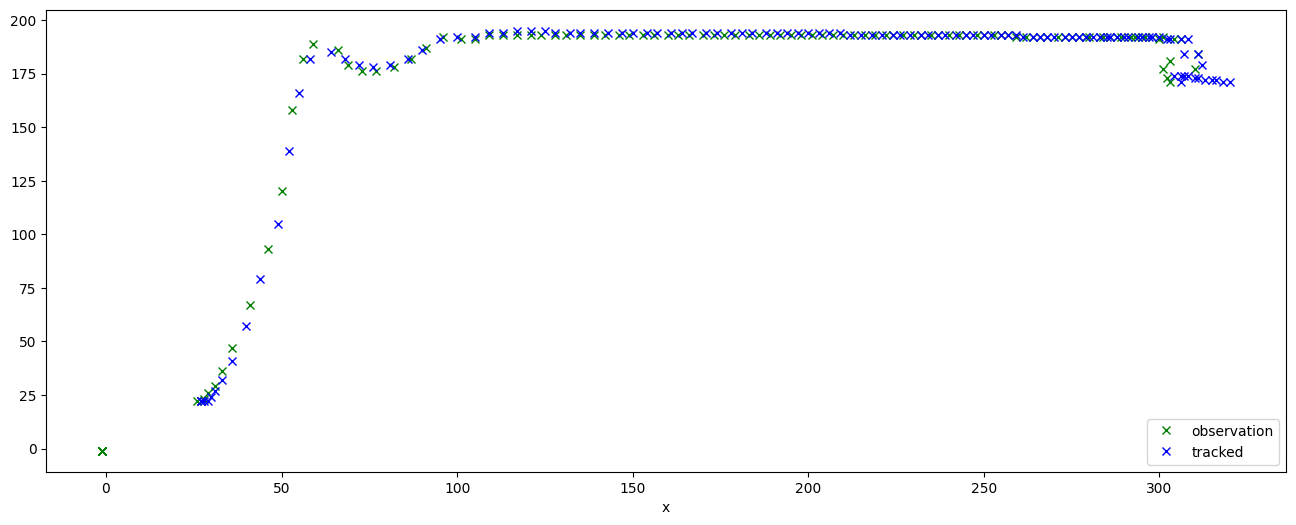

In [ ]:
# Graph
import matplotlib.pyplot as pl
import numpy as np

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
time = np.arange(0, len(img_vec)*fps, fps )
position_line = pl.plot(observation_px, observation_py, linestyle='', marker='x', color='g', label='observation')
position_line = pl.plot(predicted_px, predicted_py, linestyle='', marker='x', color='b', label='tracked')
pl.legend(loc='lower right')
pl.xlabel('x')
pl.show()

End.